In [64]:
def load_gt(gtpath):
    gt_file = json.load(open(gtpath))
    gt_file = gt_file[next(iter(gt_file.keys()))]
    pts = np.array([[x['shape_attributes']['x'], x['shape_attributes']['y']] for x in gt_file['regions']])
    return pts

def create_detmap(det, size=(80, 80)):
    detmap = np.zeros((size[0], size[1]))
    for d in det:
        detmap[np.int(d[1] / 480. * size[0]), np.int(d[0] / 640. * size[0])] = 1
        
    return detmap

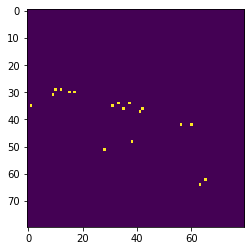

(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(720, 1280, 3)
(1080, 1920, 3)
(720, 1280, 3)
(720, 1280, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)


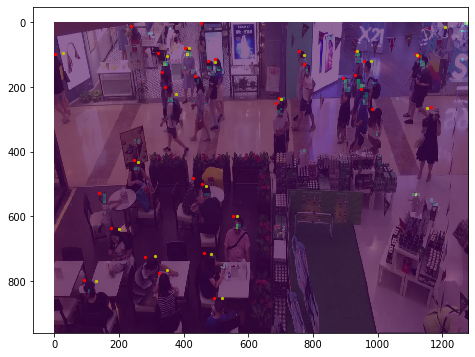

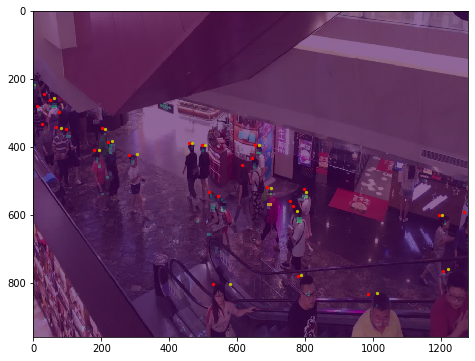

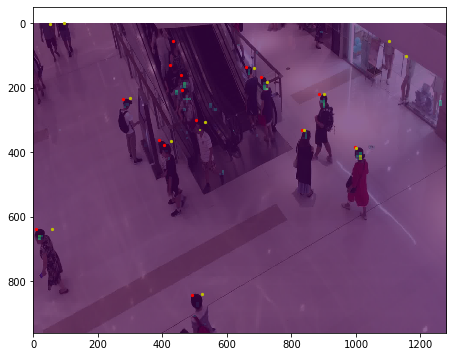

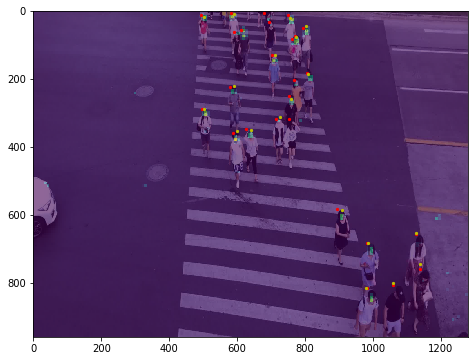

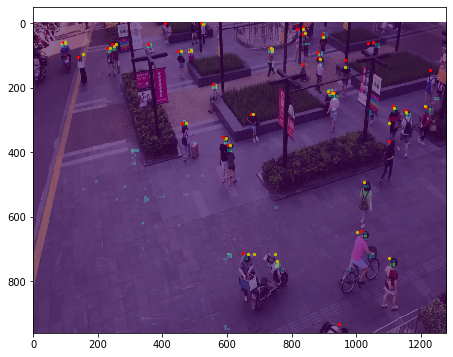

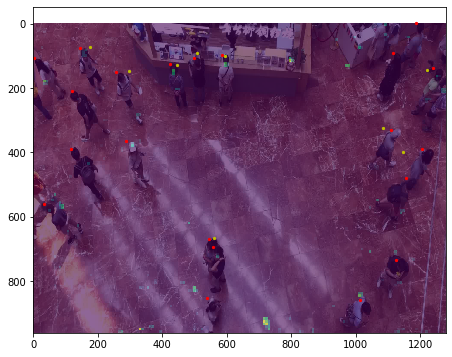

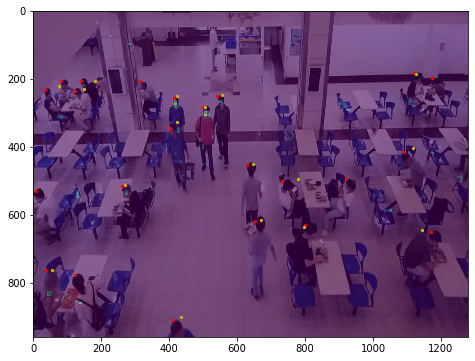

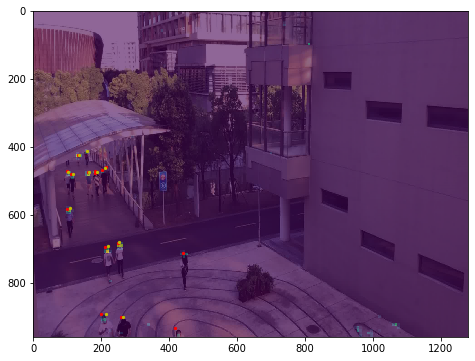

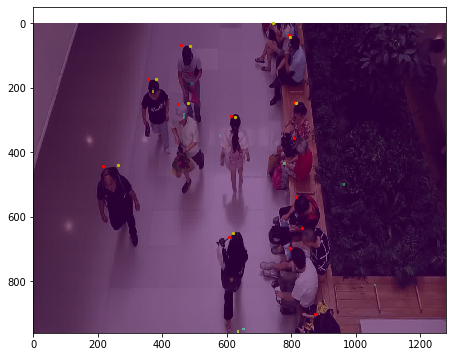

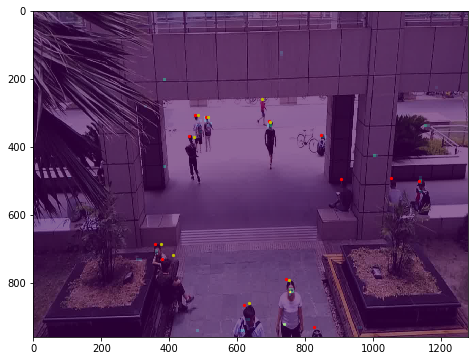

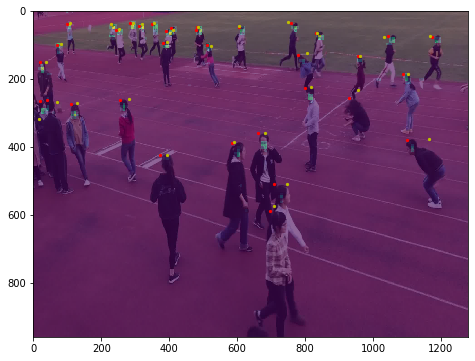

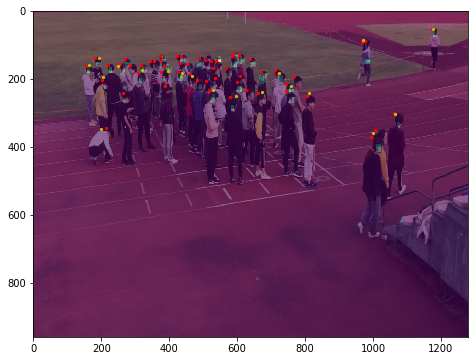

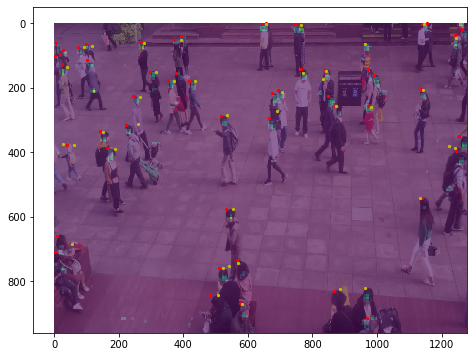

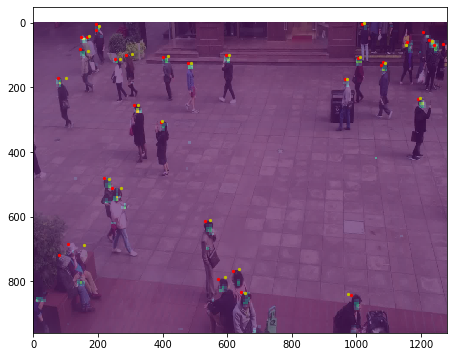

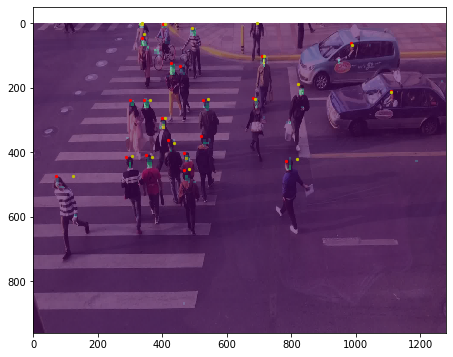

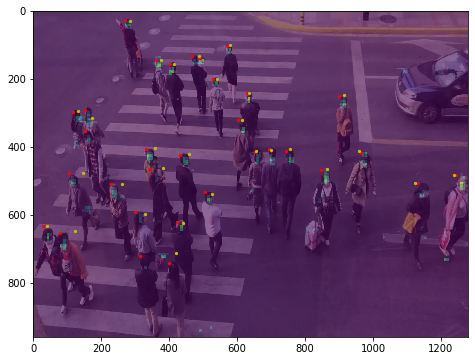

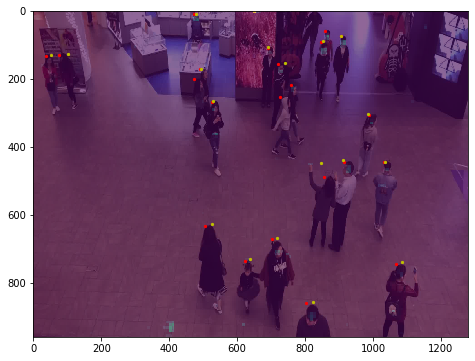

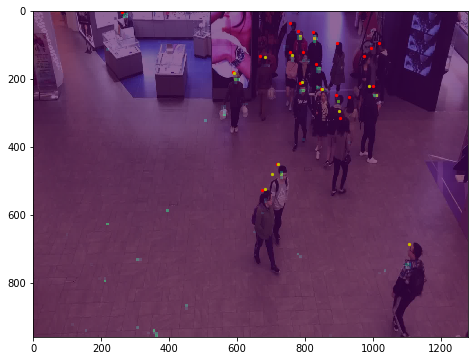

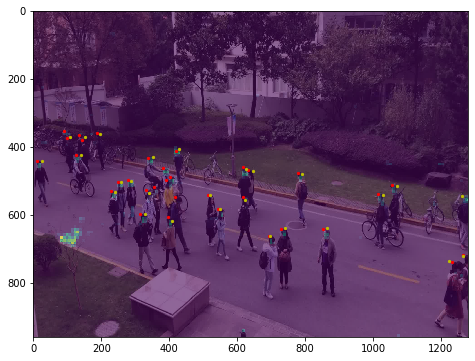

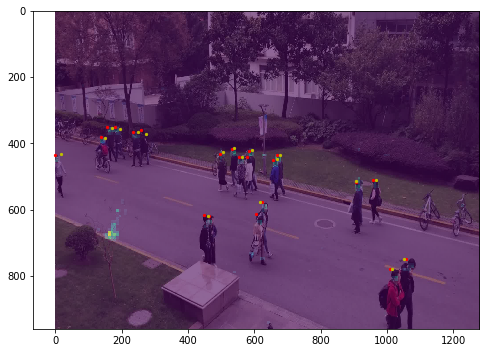

In [54]:
t = 30
for i, video_idx in enumerate(range(5, 101, 5)):
    tmp = np.load('output/fdst/test_data/960_1280/%d.npz' % video_idx)['arr_0'][t]
    img_orig = imread('/data/CROWD_DATASETS/FDST/test_data/%d/%03d.jpg' % (video_idx, t + 1))
    img_shape = img_orig.shape
    print(img_shape)
    img = resize(img_orig, (tmp.shape[0], tmp.shape[1]))
    gt = load_gt('/data/CROWD_DATASETS/FDST/test_data/%d/%03d.json' %(video_idx, t))
    det = np.loadtxt('/data/CROWD_DATASETS/FDST/baselines/test_data/%d_detm_fpn.txt' % video_idx, delimiter=',')
    det = det[det[:, 0] == t, 2:6]
    det[:, 0] += det[:, 2] / 2
    plt.figure(figsize=[8, 6])
    plt.imshow(img)
    plt.imshow(tmp, alpha=.6)
    plt.scatter(gt[:, 0] / img_shape[1] * tmp.shape[1], gt[:, 1] / img_shape[0] * tmp.shape[0], 5, 'r')
    plt.scatter(det[:, 0] / 640 * tmp.shape[1], det[:, 1] / 480. * tmp.shape[0], 5, 'y')

(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(720, 1280, 3)
(1080, 1920, 3)
(720, 1280, 3)
(720, 1280, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)


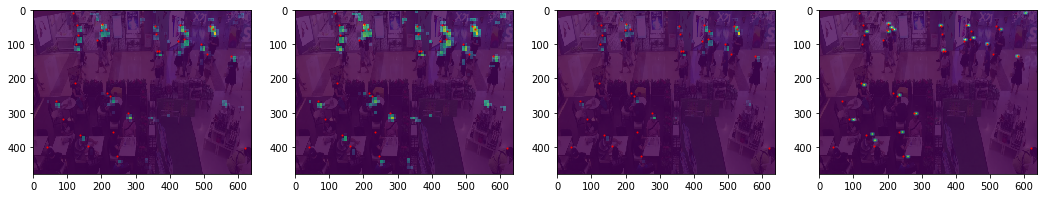

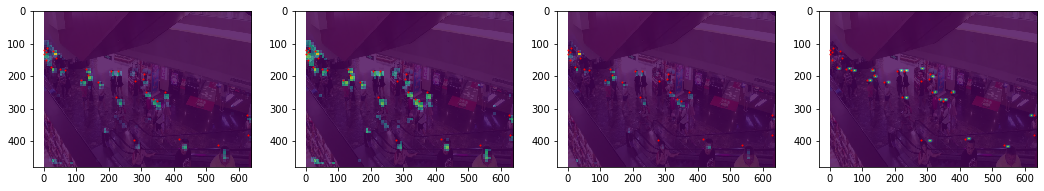

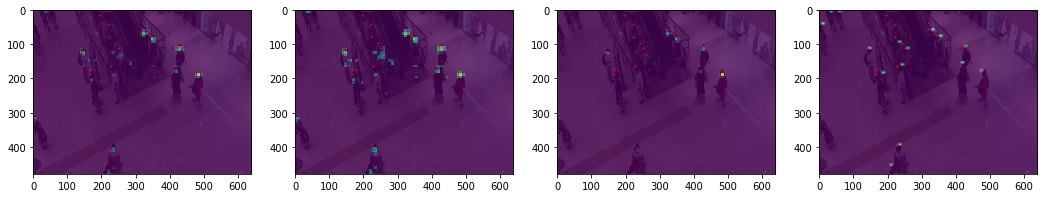

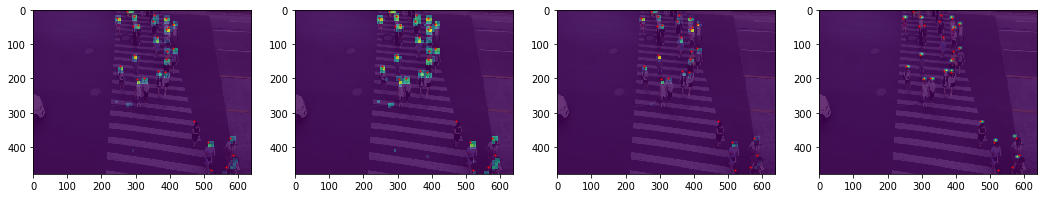

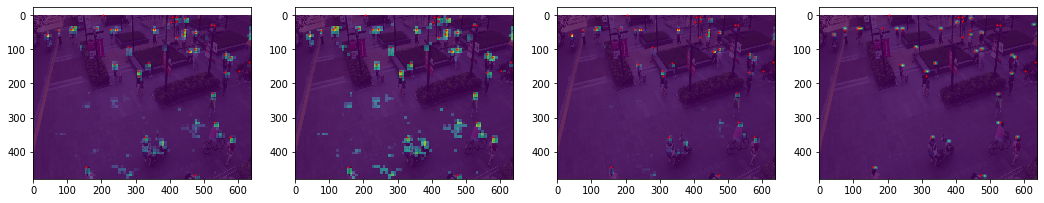

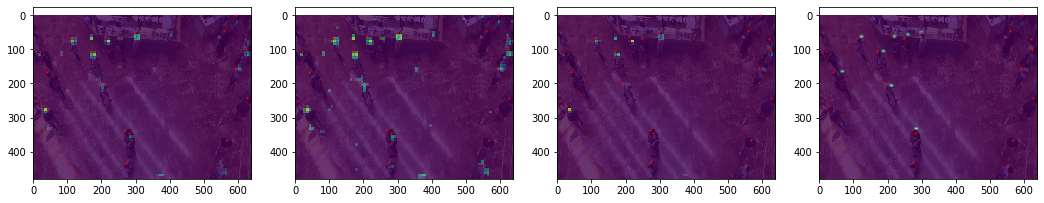

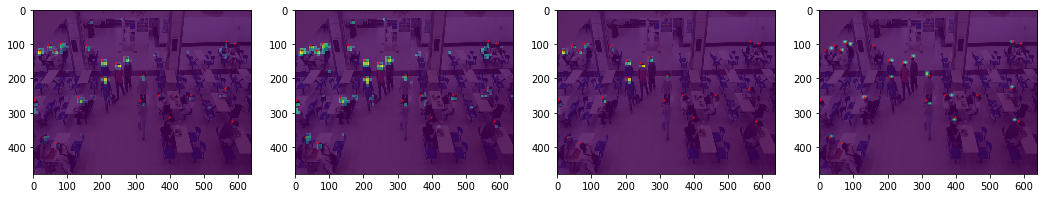

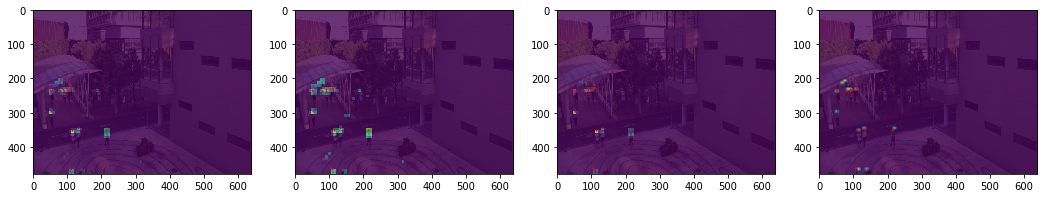

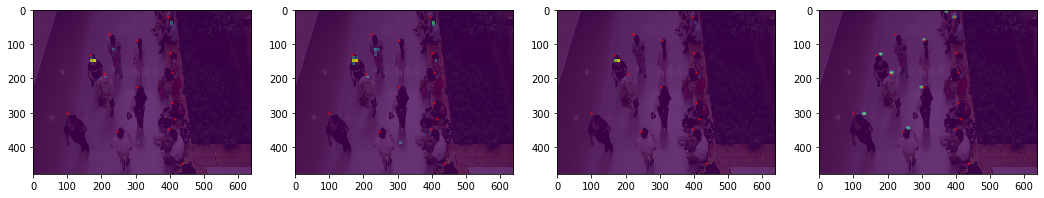

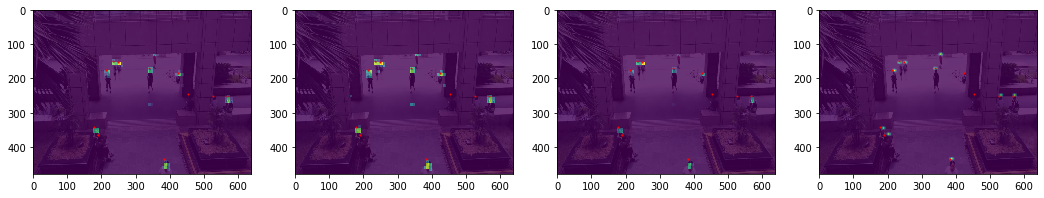

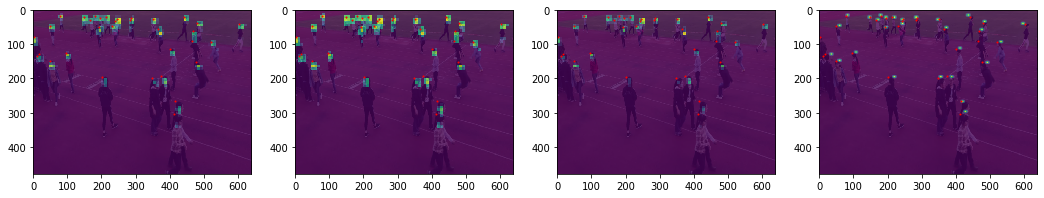

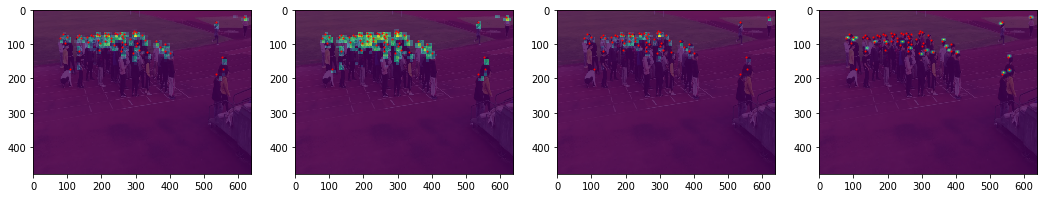

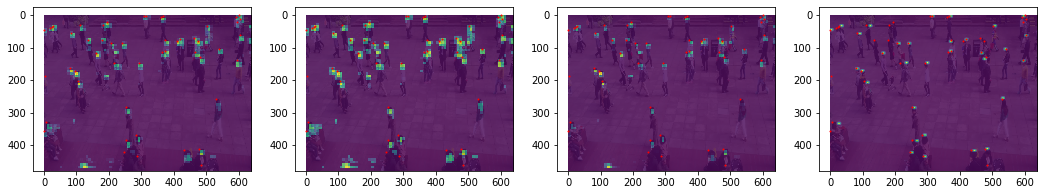

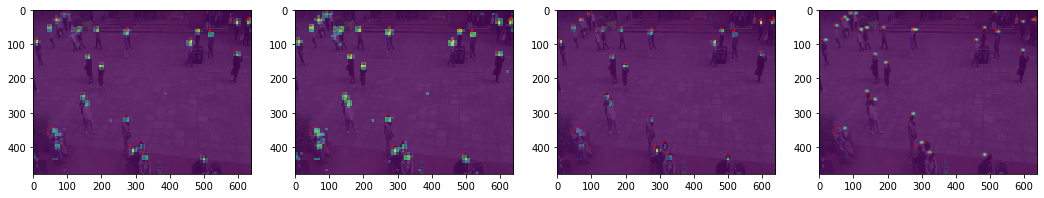

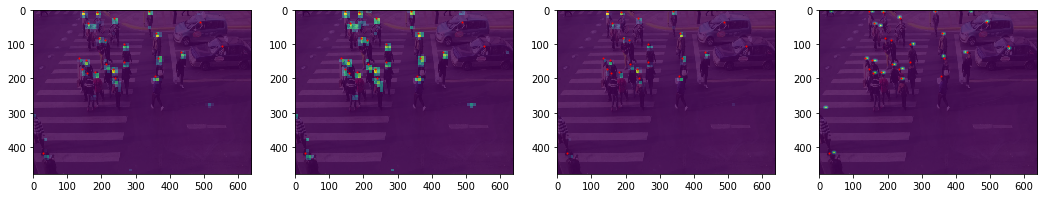

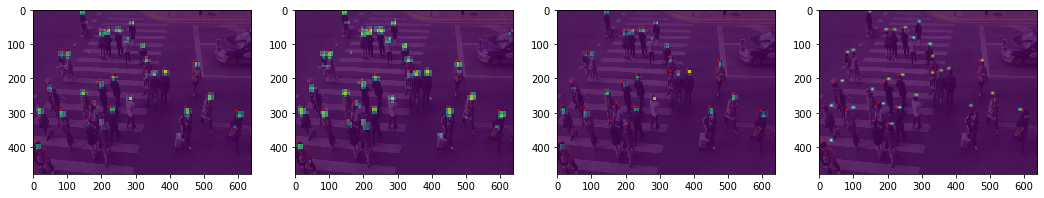

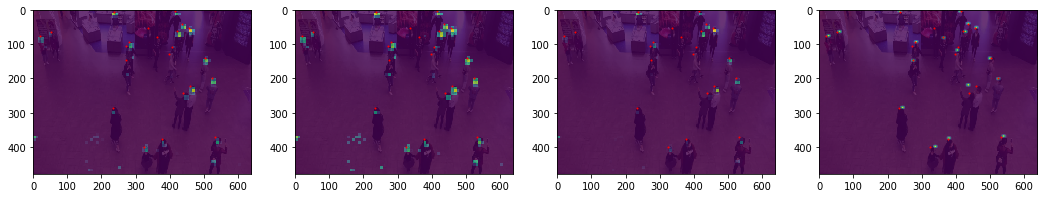

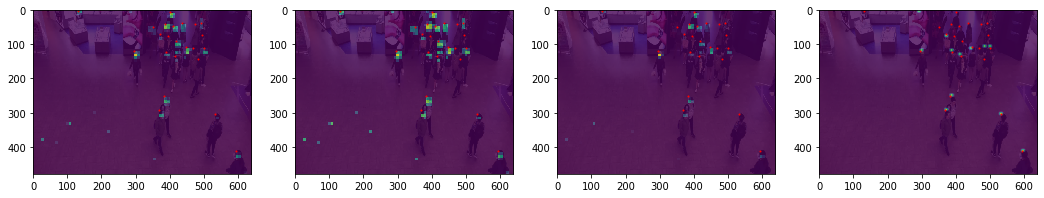

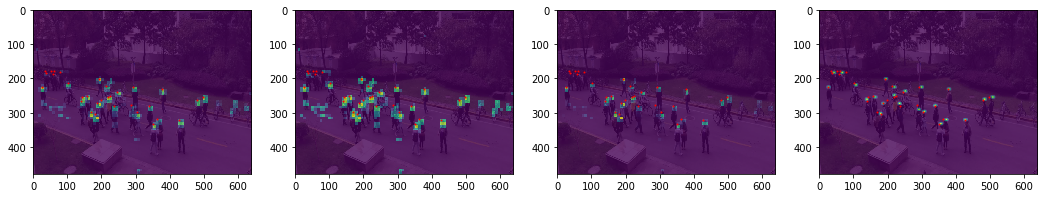

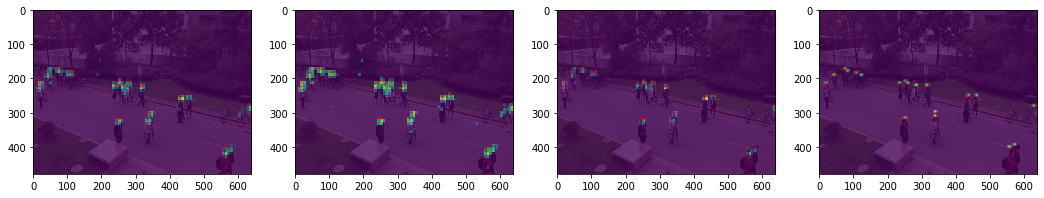

In [86]:
t = 50
for i, video_idx in enumerate(range(5, 101, 5)):
    tmp = np.load('output/fdst/test_data/480_640/%d.npz' % video_idx)['arr_0'][t]
    img_orig = imread('/data/CROWD_DATASETS/FDST/test_data/%d/%03d.jpg' % (video_idx, t + 1))
    img_shape = img_orig.shape
    print(img_shape)
    img = resize(img_orig, (tmp.shape[0], tmp.shape[1]))
    gt = load_gt('/data/CROWD_DATASETS/FDST/test_data/%d/%03d.json' %(video_idx, t))
    det = np.loadtxt('/data/CROWD_DATASETS/FDST/baselines/test_data/%d_detm_fpn.txt' % video_idx, delimiter=',')
    det = det[det[:, 0] == t, 2:6]
    det[:, 0] += det[:, 2] / 2
    detmap = create_detmap(det)
    detmap = resize(detmap, (tmp.shape[0], tmp.shape[1]))
    
    plt.figure(figsize=[18, 6])
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.imshow(tmp, alpha=.8)
    plt.scatter(gt[:, 0] / img_shape[1] * tmp.shape[1], gt[:, 1] / img_shape[0] * tmp.shape[0], 1, 'r')
    plt.subplot(1, 4, 2)
    plt.imshow(img)
    plt.imshow(tmp ** .5, alpha=.8)
    plt.scatter(gt[:, 0] / img_shape[1] * tmp.shape[1], gt[:, 1] / img_shape[0] * tmp.shape[0], 1, 'r')
    plt.subplot(1, 4, 3)
    plt.imshow(img)
    plt.imshow(tmp ** 2, alpha=.8)
    plt.scatter(gt[:, 0] / img_shape[1] * tmp.shape[1], gt[:, 1] / img_shape[0] * tmp.shape[0], 1, 'r')
    plt.subplot(1, 4, 4)
    plt.imshow(img)
    plt.imshow(detmap, alpha=.8)
    plt.scatter(gt[:, 0] / img_shape[1] * tmp.shape[1], gt[:, 1] / img_shape[0] * tmp.shape[0], 1, 'r')


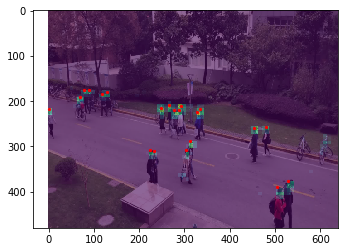

In [18]:
img = resize(img_orig, (tmp.shape[0], tmp.shape[1]))
gt = load_gt('/data/CROWD_DATASETS/FDST/test_data/%d/%03d.json' %(video_idx, t))
det = np.loadtxt('/data/CROWD_DATASETS/FDST/baselines/test_data/%d_detm_fpn.txt' % video_idx, delimiter=',')
det = det[det[:, 0] == t, 2:6]
det[:, 0] += det[:, 2] / 2
detmap = plt.imshow(create_detmap(det))

plt.imshow(img)
plt.imshow(tmp, alpha=.6)
plt.scatter(detmap)

In [12]:
img.shape

(480, 640, 3)